# 1 Author:
- Student Name: **Yuxuan Wang**
- Student ID: **210985403**

# 2 Problem formulation

**Classification Task:** Utilizing a VGG neural network, the project aims to categorize images based on whether individuals are smiling or not. The genki4k dataset, comprising a variety of facial expressions, presents a unique challenge due to the substantial variation in the appearance and intensity of smiles across different demographics. This increases the complexity of classification. Applying the VGG network specifically to the nuanced task of recognizing such subtle expressions represents an innovative approach in facial expression recognition.

**Regression Task:** This aspect involves modifying the structure of the VGG network to enable it to perform regression tasks, specifically estimating the 3D posture of a person from an image. This task is technically challenging as it requires the network to not only identify facial features but also to comprehend the 3D structure of human posture. Training the network with 3D posture labels from the genki4k dataset enhances the model's capability to understand spatial information. The transformation from 2D image analysis to 3D posture estimation represents a cutting-edge challenge in the field of machine learning, particularly when training is constrained to limited posture data.

# 3 Machine Learning Pipeline
This pipeline leverages a deep neural network, specifically the VGG16 model, for image classification tasks.

## Input
The input to this pipeline is a set of images. These images are raw data that need to be preprocessed before they can be fed into the neural network for classification.

## Preprocessing and Transformation
We proform data augmentation and normalization in the transformation stage. (Details in the next section)


## Output
The output of this ML pipeline is the classification of the input image into one of the predefined classes or the feature of the input image, determined by the task of the neural network.

## Flow of Data
The Pipeline（flow of data） through this pipeline is sequential :

1. Input images undergo preprocessing and transformation.
2. Transformed images are then fed into the VGG16 model.
3. The model processes these images through its layers, extracting features and performing classification or regression.
4. For classification task the final output is the class prediction for each input image.
5. For regression task the final output is the 3D posture estimation for each input image.

# 4 Transformation stage
We have data augmentation and normalization in the transformation stage.
For training data, we have data augmentation and normalization. For validation and test data, we only have normalization.

## Data Augmentation:
The `transforms.Compose` function is used for data augmentation, includes:
- Random horizontal flipping.
- Random rotation by 10 degrees.
- Color jittering for brightness, contrast, and saturation adjustments.
- Resizing images to 128x128 pixels.
- Converting images to grayscale and then replicating the channel to maintain a 3-channel input.
## Normalization:
Each color channel is normalized with a mean and standard deviation of 0.5. This standardization simplifies the optimization process.

# 5 Modelling

The **VGG16** network model, as defined in the Vgg16_net class, is a convolutional neural network (CNN) known for its depth and simplicity. The VGG16 model is a popular choice for image classification tasks due to its simplicity and high accuracy.It consists of following layers.

- Convolutional Layers: The model consists of five blocks of convolutional layers, each comprising 2-3 convolutional layers with ReLU activation and Batch Normalization, followed by a max-pooling layer. These layers are responsible for feature extraction from the input images.

- Fully Connected Layers: After the convolutional layers, the network includes three fully connected layers. The output of the convolutional layers is flattened before being passed through these dense layers.

The final layer outputs the class probabilities based on the number of classes specified (num_classes).


# 6 Methodology

## Model Training and Validation
We have these operations to promote the training process:

### Loss Function:
The Cross Entropy Loss (`nn.CrossEntropyLoss()`), which is well-suited for multi-class classification problems. This loss function combines Log Softmax and Negative Log Likelihood Loss in a single function.

The Mean Squared Error (`nn.MSELoss()`), which is well-suited for regression problems. This loss function computes the mean squared error between the input and target.

### Optimizer:
The Stochastic Gradient Descent (SGD) optimizer is used (`torch.optim.SGD`). It's configured with a learning rate of 0.01, momentum of 0.8, and weight decay of 0.001. These parameters are chosen to balance the speed and stability of the learning process.

### Learning Rate Scheduler:
A learning rate scheduler (`torch.optim.lr_scheduler.StepLR`) is employed to adjust the learning rate. It reduces the learning rate by a factor of 0.5 every 10 epochs (`gamma=0.5`, `step_size=10`). This strategy helps in fine-tuning the model as training progresses.

### Training Process:
The model will be trained over 20 epochs (`num_epochs = 20`). Each epoch involves a training phase (`train(epoch)`), a validation phase and a test phase (`test()`). The training phase updates the model's weights, while the validation phase assesses its performance on unseen data.

#### Training Phase (`train(epoch)`)
- Mode Setting: At the beginning of each epoch, the model is set to training mode (`model.train()`), which enables the batch normalization and dropout layers to function in their training-specific modes.
- Batch Processing: The training dataset is loaded in batches using train_loader. For each batch, the following steps are performed:
- Data Preparation: Input data and target labels are loaded onto the device (e.g., `GPU` or `CPU`).
- Gradient Initialization: Gradients are zeroed out (`optimizer.zero_grad()`) to prevent accumulation from previous forward passes.
- Forward Pass: The model processes the input data (`model(data)`) to compute predictions.
- Loss Computation: The loss is calculated using the Cross Entropy Loss function between the predictions and actual targets.
- Backward Pass: Backpropagation is conducted (`loss.backward()`) to compute the gradient of the loss with respect to model parameters.
- Parameter Update: The optimizer updates the model's weights based on the computed gradients (`optimizer.step()`).
- Training Monitoring: For every tenth batch (or as specified), training progress is printed, showing the current loss and the percentage of data processed.


---

#### Validation Phase
After each training epoch, the model is switched to evaluation mode (`model.eval()`), which disables specific layers like dropout for consistent behavior during inference.

- Loss and Accuracy Calculation: The validation dataset is processed in a similar manner as the training data, but without updating the model’s weights. For each batch:
Loss is calculated and accumulated.
Predictions are compared with actual targets to compute the number of correct predictions.
- Performance Metrics: After processing all validation batches, the average validation loss and accuracy are calculated and printed.
Learning Rate Scheduler
Post validation, the learning rate scheduler (`scheduler.step()`) is called to adjust the learning rate based on the predefined policy. This step is crucial for adapting the learning process and potentially improving convergence.

---

#### Testing Phase (`test()`)
The testing phase, conducted in a similar manner as the validation phase, evaluates the model on a separate test set.

## Performance Assessment
The performance of the model will be evaluated using the following metrics:

### Accuracy:
This metric will assess the percentage of correct predictions. It provides a straightforward measure of how often the model is correct across all classes.

### Confusion Matrix:
The confusion matrix will be used to visualize the performance of the model in terms of the true and predicted classifications. It helps in understanding not just the errors of the model, but also the types of errors (i.e., which classes are being confused with each other).

# 7 Dataset

## Directory Structure
The dataset is structured into three phases: training (train), validation (val), and testing (test). For each phase in classification task, there are two subdirectories corresponding to our categories: 'smile' and 'not_smile'. And for the regression task, we have directories named with `reg_xx` for each phase. This organization facilitates the process of feeding data into our models for different purposes (training, validation, and testing).

Here is the directory structure:
```
Dataset/
├── train/
│   ├── smile/
│   └── not_smile/
├── val/
│   ├── smile/
│   └── not_smile/
├── test/
│   ├── smile/
│   └── not_smile/
├── reg_train/
├── reg_val/
└── reg_test/
```

## Splitting and Copying
The dataset is initially split into the aforementioned categories and phases. This is achieved through a function split_and_copy which randomly shuffles the images within each category and then divides them into training (70%), validation (20%), and testing (10%) sets.

# 8 Results

In [11]:
import os
import random
import shutil
import time

import numpy as np
import torch
import torch.nn as nn
from PIL import Image
from matplotlib import pyplot as plt
from termcolor import colored
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from torchvision import transforms

In [2]:
# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

## Classification Task

In [ ]:
# 拆分数据集并复制文件
def split_and_copy(start, end, category):
    frames = [f"file{i:04d}.jpg" for i in range(start, end)]
    random.shuffle(frames)  # 随机打乱
    train = frames[:int(len(frames) * 0.7)]
    val = frames[int(len(frames) * 0.7):int(len(frames) * 0.9)]
    test = frames[int(len(frames) * 0.9):]

    for frame in train:
        shutil.copy(os.path.join(base_dir, "files", frame),
                    os.path.join(base_dir, "train", f"{category}", frame))
    for frame in val:
        shutil.copy(os.path.join(base_dir, "files", frame),
                    os.path.join(base_dir, "val", f"{category}", frame))
    for frame in test:
        shutil.copy(os.path.join(base_dir, "files", frame),
                    os.path.join(base_dir, "test", f"{category}", frame))


# 对于每个类别执行拆分和复制
split_and_copy(1, 2163, "smile")  # smile 类别
split_and_copy(2163, 4001, "not_smile")  # not_smile 类别

In [3]:
# 定义路径变量
base_dir = "Dataset"
categories = ["smile", "not_smile"]
phases = ["train", "val", "test"]

# 创建目录结构
for phase in phases:
    for category in categories:
        os.makedirs(os.path.join(base_dir, f"{phase}/{category}"), exist_ok=True)
# check the number of images in each folder
for phase in phases:
    for category in categories:
        print(f"{phase}/{category}: {len(os.listdir(os.path.join(base_dir, phase, category)))}")

train/smile: 1513
train/not_smile: 1286
val/smile: 432
val/not_smile: 368
test/smile: 217
test/not_smile: 184


In [4]:
# 定义自定义数据集类
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        初始化函数
        root_dir (string): 数据集的根目录。
        transform (callable, optional): 应用于每个样本的转换。
        """
        self.root_dir = root_dir
        self.transform = transform
        self.images = []
        self.labels = []

        # 定义类别与标签的映射
        class_to_label = {"not_smile": 0, "smile": 1}

        # 遍历每个子目录
        for subdir in sorted(os.listdir(root_dir)):
            folder = os.path.join(root_dir, subdir)
            if os.path.isdir(folder):
                label = class_to_label[subdir]  # 根据文件夹名称获取标签
                for file in os.listdir(folder):
                    if file.lower().endswith("jpg"):
                        self.images.append(os.path.join(folder, file))
                        self.labels.append(label)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = Image.open(self.images[idx])
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label


# 定义图像转换
transform_TRAIN = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(),
    transforms.Resize((128, 128)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# 创建数据集
train_dataset = CustomDataset(root_dir='Dataset/train', transform=transform_TRAIN)
val_dataset = CustomDataset(root_dir='Dataset/val', transform=transform)
test_dataset = CustomDataset(root_dir='Dataset/test', transform=transform)

# 创建 DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [5]:
# VGG16网络模型
class Vgg16_net(nn.Module):
    def __init__(self, num_classes=2):
        super(Vgg16_net, self).__init__()
        self.num_classes = num_classes

        # 第一层卷积层
        self.layer1 = nn.Sequential(
            # 输入3通道图像，输出64通道特征图，卷积核大小3x3，步长1，填充1
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1),
            # 对64通道特征图进行Batch Normalization
            nn.BatchNorm2d(64),
            # 对64通道特征图进行ReLU激活函数
            nn.ReLU(inplace=True),
            # 输入64通道特征图，输出64通道特征图，卷积核大小3x3，步长1，填充1
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
            # 对64通道特征图进行Batch Normalization
            nn.BatchNorm2d(64),
            # 对64通道特征图进行ReLU激活函数
            nn.ReLU(inplace=True),

            # 进行2x2的最大池化操作，步长为2
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # 第二层卷积层
        self.layer2 = nn.Sequential(
            # 输入64通道特征图，输出128通道特征图，卷积核大小3x3，步长1，填充1
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            # 对128通道特征图进行Batch Normalization
            nn.BatchNorm2d(128),
            # 对128通道特征图进行ReLU激活函数
            nn.ReLU(inplace=True),

            # 输入128通道特征图，输出128通道特征图，卷积核大小3x3，步长1，填充1
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
            # 对128通道特征图进行Batch Normalization
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            # 进行2x2的最大池化操作，步长为2
            nn.MaxPool2d(2, 2)
        )
        # 第三层卷积层
        self.layer3 = nn.Sequential(
            # 输入为128通道，输出为256通道，卷积核大小为33，步长为1，填充大小为1
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
            # 批归一化
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),

            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),

            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(2, 2)
        )

        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(2, 2)
        )

        self.layer5 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(2, 2)
        )

        self.conv = nn.Sequential(
            self.layer1,
            self.layer2,
            self.layer3,
            self.layer4,
            self.layer5
        )

        self.fc = nn.Sequential(
            nn.Linear(512 * 4 * 4, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),

            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),

            nn.Linear(256, self.num_classes)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)  # 将卷积层输出的多维数据压平成一维
        x = self.fc(x)
        return x

In [6]:
# 创建模型实例，对于微笑分类任务，我们只有两个类别
model = Vgg16_net()
# Move the model to the GPU
model = model.to(device)

summary(model, input_size=(3, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 128]           1,792
            Conv2d-2         [-1, 64, 128, 128]           1,792
       BatchNorm2d-3         [-1, 64, 128, 128]             128
       BatchNorm2d-4         [-1, 64, 128, 128]             128
              ReLU-5         [-1, 64, 128, 128]               0
              ReLU-6         [-1, 64, 128, 128]               0
            Conv2d-7         [-1, 64, 128, 128]          36,928
            Conv2d-8         [-1, 64, 128, 128]          36,928
       BatchNorm2d-9         [-1, 64, 128, 128]             128
      BatchNorm2d-10         [-1, 64, 128, 128]             128
             ReLU-11         [-1, 64, 128, 128]               0
             ReLU-12         [-1, 64, 128, 128]               0
        MaxPool2d-13           [-1, 64, 64, 64]               0
        MaxPool2d-14           [-1, 64,

In [7]:
loss_object = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.8, weight_decay=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5, last_epoch=-1)

In [8]:
# Training
def train(epoch):
    model.train()  # 设置模型为训练模式
    train_loss = 0
    print(colored("Train Epoch:", "red"), colored(f" {epoch} ", "blue"), )
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_object(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        if batch_idx % 10 == 5:
            print(
                f"[{batch_idx * len(data):5d}/{len(train_loader.dataset)} "
                f"({100. * batch_idx / len(train_loader):3.0f}%)]\tLoss: {loss.item():.6f}")

    # 在每个 epoch 后进行验证
    model.eval()
    val_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            val_loss += loss_object(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    val_loss /= len(val_loader)
    val_accuracy = 100. * correct / len(val_loader.dataset)
    print(
        colored("\nValidation", "blue"),
        f'Average loss: {val_loss:.4f},'
        f'Accuracy: {correct}/{len(val_loader.dataset)} ',
        colored(f'({val_accuracy:.0f}%)', "green"), )

    # 更新学习率调度器
    print(colored("Learning rate:", "blue"), colored(f"{scheduler.get_last_lr()[0]:.6f}", "green"))
    scheduler.step()


# Test
def test():
    model.eval()  # 设置模型为评估模式
    test_loss = 0
    correct = 0

    with torch.no_grad():  # 在评估模式下，不计算梯度
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_object(output, target).item()  # 累积损失
            pred = output.argmax(dim=1, keepdim=True)  # 获取预测结果
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader)
    accuracy = 100. * correct / len(test_loader.dataset)

    print(
        colored("Test set", "yellow"),
        f'Average loss: {test_loss:.4f},'
        f'Accuracy: {correct}/{len(test_loader.dataset)} ',
        colored(f'({accuracy:.0f}%)\n', "green"),
    )

In [23]:
num_epochs = 20

for epoch in range(1, num_epochs + 1):
    start_time = time.time()
    train(epoch)
    test()
    end_time = time.time()
    print(colored(f"Epoch {epoch} cost {end_time - start_time:.0f}s in total", "blue"))

Train Epoch:  1 
[  160/2799 (  6%)]	Loss: 0.064262
[  480/2799 ( 17%)]	Loss: 0.025822
[  800/2799 ( 28%)]	Loss: 0.203019
[ 1120/2799 ( 40%)]	Loss: 0.145573
[ 1440/2799 ( 51%)]	Loss: 0.033916
[ 1760/2799 ( 62%)]	Loss: 0.032226
[ 2080/2799 ( 74%)]	Loss: 0.038646
[ 2400/2799 ( 85%)]	Loss: 0.079412
[ 2720/2799 ( 97%)]	Loss: 0.055829

Validation Average loss: 0.3105,Accuracy: 726/800  (91%)
Learning rate: 0.002500
Test set Average loss: 0.2349,Accuracy: 366/401  (91%)

Epoch 1 cost 14s in total
Train Epoch:  2 
[  160/2799 (  6%)]	Loss: 0.040952
[  480/2799 ( 17%)]	Loss: 0.010501
[  800/2799 ( 28%)]	Loss: 0.013165
[ 1120/2799 ( 40%)]	Loss: 0.032329
[ 1440/2799 ( 51%)]	Loss: 0.035435
[ 1760/2799 ( 62%)]	Loss: 0.021893
[ 2080/2799 ( 74%)]	Loss: 0.028379
[ 2400/2799 ( 85%)]	Loss: 0.046896
[ 2720/2799 ( 97%)]	Loss: 0.038145

Validation Average loss: 0.3329,Accuracy: 729/800  (91%)
Learning rate: 0.002500
Test set Average loss: 0.2335,Accuracy: 374/401  (93%)

Epoch 2 cost 13s in total
Train Ep

In [24]:
# Save the model checkpoint
filename = f'Classification_VGG_1222.pth'
torch.save(model.state_dict(), filename)

In [9]:
# Load the model checkpoint
model.load_state_dict(torch.load('Classification_VGG_1222.pth'))

<All keys matched successfully>

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       184
           1       0.93      0.95      0.94       217

    accuracy                           0.93       401
   macro avg       0.93      0.93      0.93       401
weighted avg       0.93      0.93      0.93       401



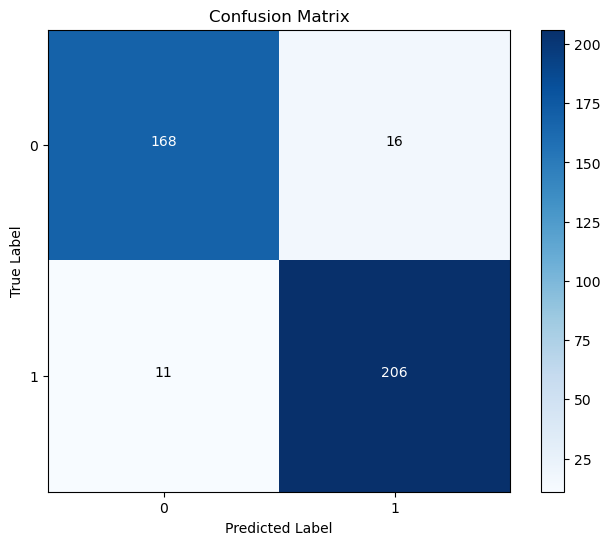

In [13]:
# Evaluation
from sklearn.metrics import classification_report

model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)
        y_true.extend(target.cpu().numpy())
        y_pred.extend(pred.cpu().numpy())

print(classification_report(y_true, y_pred))

# pylot confusion matrix
from sklearn.metrics import confusion_matrix

# Plotting the confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.colorbar()

# Adding labels for the cells
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(np.unique(y_true))))
plt.yticks(np.arange(len(np.unique(y_true))))
plt.show()

In [ ]:
# Release GPU memory cache
torch.cuda.empty_cache()
del model
del train_loader
del val_loader
del test_loader

## Regression Task

In [14]:
all_label = []
# Parse txt label file to np array
with open('Dataset/labels.txt') as f:
    for line in f:
        # Assuming each line is comma-separated
        processed_line = [float(value) for value in line.strip().split(' ')]

        # Step 4: Append processed data to list
        all_label.append(processed_line)

data_array = np.array(all_label)

In [ ]:
# Split data into train, val, test
def split_and_copy(start, end):
    frames = [f"file{i:04d}.jpg" for i in range(start, end)]
    train = frames[:int(len(frames) * 0.7)]
    val = frames[int(len(frames) * 0.7):int(len(frames) * 0.9)]
    test = frames[int(len(frames) * 0.9):]

    for frame in train:
        shutil.copy(os.path.join(base_dir, "files", frame),
                    os.path.join(base_dir, "reg_train", frame))
    for frame in val:
        shutil.copy(os.path.join(base_dir, "files", frame),
                    os.path.join(base_dir, "reg_val", frame))
    for frame in test:
        shutil.copy(os.path.join(base_dir, "files", frame),
                    os.path.join(base_dir, "reg_test", frame))


# 对于每个类别执行拆分和复制
split_and_copy(1, 4001)

In [15]:
# 定义路径变量
base_dir = "Dataset"
phases = ["train", "val", "test"]

# 创建目录结构
for phase in phases:
    os.makedirs(os.path.join(base_dir, f"reg_{phase}"), exist_ok=True)

# check the number of images in each folder
for phase in phases:
    print(f"reg_{phase}: {len(os.listdir(os.path.join(base_dir, f'reg_{phase}')))}")

reg_train: 2800
reg_val: 800
reg_test: 400


In [16]:
# 定义自定义数据集类
class CustomDataset(Dataset):
    array = data_array

    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = []
        self.labels = []

        # 检查root_dir是否是目录
        if os.path.isdir(root_dir):
            # 遍历root_dir中的文件
            for file in sorted(os.listdir(root_dir)):
                if file.startswith("file"):
                    file_path = os.path.join(root_dir, file)  # 构建文件路径
                    self.images.append(file_path)
                    # 从文件名中提取索引并调整以匹配data_array
                    file_index = int(file[4:8]) - 1
                    self.labels.append(self.array[file_index, 1:].astype(np.float32))
        else:
            raise RuntimeError(f"The provided root directory {root_dir} does not exist or is not a directory.")

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = Image.open(self.images[idx])
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label)


# 定义图像转换
transform_TRAIN = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(),
    transforms.Resize((128, 128)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# 创建数据集
train_dataset = CustomDataset(root_dir='Dataset/reg_train', transform=transform_TRAIN)
val_dataset = CustomDataset(root_dir='Dataset/reg_val', transform=transform)
test_dataset = CustomDataset(root_dir='Dataset/reg_test', transform=transform)

# 创建 DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [17]:
# VGG16网络模型
class Vgg16_reg_net(nn.Module):
    def __init__(self):
        super(Vgg16_reg_net, self).__init__()

        # 第一层卷积层
        self.layer1 = nn.Sequential(
            # 输入3通道图像，输出64通道特征图，卷积核大小3x3，步长1，填充1
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1),
            # 对64通道特征图进行Batch Normalization
            nn.BatchNorm2d(64),
            # 对64通道特征图进行ReLU激活函数
            nn.ReLU(inplace=True),
            # 输入64通道特征图，输出64通道特征图，卷积核大小3x3，步长1，填充1
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
            # 对64通道特征图进行Batch Normalization
            nn.BatchNorm2d(64),
            # 对64通道特征图进行ReLU激活函数
            nn.ReLU(inplace=True),

            # 进行2x2的最大池化操作，步长为2
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # 第二层卷积层
        self.layer2 = nn.Sequential(
            # 输入64通道特征图，输出128通道特征图，卷积核大小3x3，步长1，填充1
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            # 对128通道特征图进行Batch Normalization
            nn.BatchNorm2d(128),
            # 对128通道特征图进行ReLU激活函数
            nn.ReLU(inplace=True),

            # 输入128通道特征图，输出128通道特征图，卷积核大小3x3，步长1，填充1
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
            # 对128通道特征图进行Batch Normalization
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            # 进行2x2的最大池化操作，步长为2
            nn.MaxPool2d(2, 2)
        )
        # 第三层卷积层
        self.layer3 = nn.Sequential(
            # 输入为128通道，输出为256通道，卷积核大小为33，步长为1，填充大小为1
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
            # 批归一化
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),

            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),

            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(2, 2)
        )

        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(2, 2)
        )

        self.layer5 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(2, 2)
        )

        self.conv = nn.Sequential(
            self.layer1,
            self.layer2,
            self.layer3,
            self.layer4,
            self.layer5
        )

        self.fc = nn.Sequential(
            nn.Linear(512 * 4 * 4, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),

            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),

            nn.Linear(256, 3)  # 输出为3，对应三个回归目标
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)  # 将卷积层输出的多维数据压平成一维
        x = self.fc(x)
        return x

In [18]:
# 创建模型实例
model_reg = Vgg16_reg_net()
# Move the model to the GPU
model_reg = model_reg.to(device)

summary(model_reg, input_size=(3, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 128]           1,792
            Conv2d-2         [-1, 64, 128, 128]           1,792
       BatchNorm2d-3         [-1, 64, 128, 128]             128
       BatchNorm2d-4         [-1, 64, 128, 128]             128
              ReLU-5         [-1, 64, 128, 128]               0
              ReLU-6         [-1, 64, 128, 128]               0
            Conv2d-7         [-1, 64, 128, 128]          36,928
            Conv2d-8         [-1, 64, 128, 128]          36,928
       BatchNorm2d-9         [-1, 64, 128, 128]             128
      BatchNorm2d-10         [-1, 64, 128, 128]             128
             ReLU-11         [-1, 64, 128, 128]               0
             ReLU-12         [-1, 64, 128, 128]               0
        MaxPool2d-13           [-1, 64, 64, 64]               0
        MaxPool2d-14           [-1, 64,

In [19]:
loss_object = nn.MSELoss()
optimizer = torch.optim.SGD(model_reg.parameters(), lr=0.01, momentum=0.8, weight_decay=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5, last_epoch=-1)

In [20]:
# Training
def train(epoch):
    model_reg.train()  # 设置模型为训练模式
    train_loss = 0
    print(colored("Train Epoch:", "red"), colored(f" {epoch} ", "blue"), )
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model_reg(data)
        loss = loss_object(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        if batch_idx % 20 == 15:
            print(
                f"[{batch_idx * len(data):5d}/{len(train_loader.dataset)} "
                f"({100. * batch_idx / len(train_loader):3.0f}%)]\tLoss: {loss.item():.6f}")

    # 在每个 epoch 后进行验证
    model_reg.eval()
    val_loss = 0
    with torch.no_grad():
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)
            output = model_reg(data)
            val_loss += loss_object(output, target).item()

    val_loss /= len(val_loader)

    print(
        colored("\nValidation", "blue"),
        f'Average loss: ',
        colored(f"{val_loss:.4f}", "green")
    )

    # 更新学习率调度器
    print(colored("Learning rate:", "blue"), colored(f"{scheduler.get_last_lr()[0]:.6f}", "yellow"))
    scheduler.step()


# Test
def test():
    model_reg.eval()  # 设置模型为评估模式
    test_loss = 0

    with torch.no_grad():  # 在评估模式下，不计算梯度
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model_reg(data)
            test_loss += loss_object(output, target).item()  # 累积损失

    test_loss /= len(test_loader)

    print(
        colored("Test set", "yellow"),
        f'Average loss: ',
        colored(f"{test_loss:.4f}\n", "green")
    )

In [34]:
num_epochs = 50

for epoch in range(1, num_epochs + 1):
    train(epoch)
    test()

Train Epoch:  1 
[  480/2800 ( 17%)]	Loss: 0.044097
[ 1120/2800 ( 40%)]	Loss: 0.025241
[ 1760/2800 ( 62%)]	Loss: 0.019795
[ 2400/2800 ( 85%)]	Loss: 0.038683

Validation Average loss:  0.0315
Learning rate: 0.010000
Test set Average loss:  0.0380

Train Epoch:  2 
[  480/2800 ( 17%)]	Loss: 0.022849
[ 1120/2800 ( 40%)]	Loss: 0.027592
[ 1760/2800 ( 62%)]	Loss: 0.035015
[ 2400/2800 ( 85%)]	Loss: 0.036572

Validation Average loss:  0.0314
Learning rate: 0.010000
Test set Average loss:  0.0379

Train Epoch:  3 
[  480/2800 ( 17%)]	Loss: 0.027909
[ 1120/2800 ( 40%)]	Loss: 0.019654
[ 1760/2800 ( 62%)]	Loss: 0.028420
[ 2400/2800 ( 85%)]	Loss: 0.029372

Validation Average loss:  0.0315
Learning rate: 0.010000
Test set Average loss:  0.0379

Train Epoch:  4 
[  480/2800 ( 17%)]	Loss: 0.021705
[ 1120/2800 ( 40%)]	Loss: 0.032550
[ 1760/2800 ( 62%)]	Loss: 0.026641
[ 2400/2800 ( 85%)]	Loss: 0.028123

Validation Average loss:  0.0316
Learning rate: 0.010000
Test set Average loss:  0.0382

Train Epoch:

In [35]:
# Save the model checkpoint
filename = f'Regression_VGG_1222.pth'
torch.save(model_reg.state_dict(), filename)

In [22]:
# Load the model checkpoint
model_reg.load_state_dict(torch.load('Regression_VGG_1222.pth'))

<All keys matched successfully>

In [23]:
# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pred_val = []
true_val = []
model_reg.eval()
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model_reg(data)
        pred_val.extend(output.cpu().numpy())
        true_val.extend(target.cpu().numpy())

print("MSE: ", mean_squared_error(true_val, pred_val))
print("MAE: ", mean_absolute_error(true_val, pred_val))
print("R2: ", r2_score(true_val, pred_val))

MSE:  0.03759666
MAE:  0.13289125
R2:  -0.001080308741399157


# 9 Conclusions
This report presented a comprehensive study utilizing a VGG neural network for two distinct tasks: image classification based on smiles and 3D posture estimation from images.
The classification task, focused on detecting smiles in the genki4k dataset, highlighted the network's capability to handle variations in facial expressions across diverse demographics. This underlines the potential of deep learning in nuanced facial expression recognition.
Conversely, the regression task pushed the boundaries of the VGG network's application, adapting it to understand and estimate 3D human postures from 2D images. This innovative application demonstrates the versatility of neural networks in comprehending complex spatial information, even with limited training data.

**Proposed Improvement: Unified Multi-Task Learning Model**

Current Approach
In the initial phase of our project, we employed two distinct models based on the VGG neural network architecture. The first model was dedicated to the classification task of detecting smiles in images, utilizing the genki4k dataset. The second model focused on the regression task of estimating 3D head postures from the same set of images. While effective, this approach necessitated separate training, tuning, and maintenance for each model, leading to increased computational resources and time.

Proposed Improvement
In a bid to enhance efficiency and streamline our process, we propose a significant improvement to our methodology: the integration of both tasks - smile detection and head posture estimation - into a single unified model. This approach leverages the concept of multi-task learning, where a shared neural network learns to perform multiple tasks simultaneously.
